In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api         as sm
import statsmodels.formula.api as smf
from scipy.interpolate import interp1d


Lectura de la sabana de datos

In [2]:
# read file
path = "data/"
file = "sabana_outer_21_07_2020_v1_DF.csv"
#file = "sabana_outer_v3_DF.csv"
df=pd.read_csv(path + file)  
df["id"] = df["id"].astype('Int64')
df["dia"] = df["dia"].astype('Int64')
df["mes"] = df["mes"].astype('Int64')
df["ano"] = df["ano"].astype('Int64')
df["edad"] = round(df["ano"]- pd.DatetimeIndex(df["fecha_nacimiento"]).year,0)
print(df.shape)
df.sample(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,20,29,93,217) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18408, 261)


,fecha_consulta,sexo_paciente,fecha_nacimiento,diagnostico_principal,imc,fecha2,bsa,calidad de vida relacionada en salud,dlqi,easi,...,sindrome metabolico -> presencia de sindrome metabolico complet,terapia biologica -> medicamento que requiere ajuste de dosis p,terapia biologica -> tratamiento activo,terapia sistematica previa -> tratamiento previo con fallo tera,terapia sistemica de primera linea -> tratamiento activo,id,ano,mes,dia,edad
2413,2019-12-11,m,1973-10-27,l400,25.05,2019-12-11,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3096077,2019,12,11,46.0
4496,2020-02-12,m,1983-06-09,l400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2738159,2020,2,12,37.0
497,2018-09-24,f,1967-05-25,l400,NaN,2018-09-24,NaN,55.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3437462,2018,9,24,51.0
7193,2019-12-05,f,2005-08-29,l400,22.20,2019-12-05,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2290408,2019,12,5,14.0
6404,2019-07-12,m,1987-11-17,l400,NaN,2019-07-12,NaN,76.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2432168,2019,7,12,32.0


In [3]:
ids = df["id"].unique()#los id en el dataset
cols = df.columns# las variables medidas
for c in cols:
    print(c)


fecha_consulta
sexo_paciente
fecha_nacimiento
diagnostico_principal
imc
fecha2
bsa
calidad de vida relacionada en salud
dlqi
easi
his4
hurley
napsi
napsi mm
pasi
pga
poem
psoriasis moderada a severa
riesgo asociado
riesgo asociado - control
riesgo asociado psoriasis leve
riesgo_asociado
scorad
seguimiento farmacoterapeutico
seguimiento nutricionista
seguimiento psicologico
seguimiento terapia fisica
terapias previas
topas
uas7
uct
fecha
resul_total_bsa
sede_de_atencion_bsa
cabeza_y_cuello_bsa
extremidades_inferiores_bsa
extremidades_superiores_bsa
tronco_bsa
fecha.1
total_global_cdv
salud_fisica_cdv
psicologica_cdv
relaciones_interpersonales_cdv
entorno_cdv
sede_de_atencion_cdv
como_puntuaria_su_calidad_de_vida?_cdv
con_que_frecuencia_tiene_sentimientos_negativos,tales_como_trsi
cual_es_su_capacidad_de_concentracion?
cuan_saludable_es_el_ambiente_fisico_de_su_alrededor?
cuan_satisfecho_esta_con_el_acceso_que_tiene_a_los_servicios_sa
cuan_satisfecho_esta_con_el_apoyo_que_tiene_de_sus_am

version decimal de la fecha.. ano.decimal

In [4]:
df["ano_dec"] = df["ano"]+(1/12)*df["mes"] + (1/365)*df["dia"]

In [5]:
varsX = ["dlqi","pga","sexo_paciente","imc","bsa","edad",
         "eritema","endurecimiento","descamacion",
         "depresion_total","ansiedad_total","trastorno_sexual_total","psi_total",
         "medicamento_acido_folico", "medicamento_acido_folico/mometasona","medicamento_acido_retinoico",
         "medicamento_acido_salicilico/betametasona", "medicamento_acido_salicilico/mometasona", "medicamento_acitretin",
         "medicamento_adalimumab", "medicamento_alquitran_de_hulla", "medicamento_anticonceptivos",
         "medicamento_bemerin", "medicamento_betametasona", "medicamento_calcipotriol", 
         "medicamento_calcipotriol+esteroide", "medicamento_cefalexina", "medicamento_certolizumab",
         "medicamento_cetirizina", "medicamento_ciclopirox", "medicamento_ciclosporina", "medicamento_clindamicina",
         "medicamento_clindamicina/rifampicina", "medicamento_clobetazol", "medicamento_clorfeniramina",
         "medicamento_clotrimazol", "medicamento_dapsona", "medicamento_deflazacort", "medicamento_dermacortine",
         "medicamento_dermovate", "medicamento_desonida", "medicamento_dicloxacilina", "medicamento_difenhidramina",
         "medicamento_diprosalic", "medicamento_doxiciclina", "medicamento_eritromicina", "medicamento_espironolactona",
         "medicamento_etanercept", "medicamento_etoricoxib", 
         "medicamento_fototerapia_uv_a", "medicamento_fototerapia_uv_b", "medicamento_fototerapia_uva_1", 
         "medicamento_golimumab", "medicamento_guselkumab", "medicamento_hidrocortizona", "medicamento_infiltraciones",
         "medicamento_infliximab", "medicamento_isoniazida", "medicamento_isotretinoina", "medicamento_ixekinumab",
         "medicamento_ketoconazol", "medicamento_leflunomida", "medicamento_metotrexate", "medicamento_mometasona",
         "medicamento_mupirocina", "medicamento_piridoxina", "medicamento_prednisolona", 
         "medicamento_quimiofototerapia", "medicamento_ranitidina", "medicamento_rifampicina", "medicamento_secukinumab",
         "medicamento_soridem", "medicamento_sulfasalazina", "medicamento_tacrolimus", "medicamento_tazaroteno", 
         "medicamento_tetraciclina_clorhidrato", "medicamento_tofacitinib", "medicamento_trimetoprim/sulfametoxazol",
         "medicamento_urea_granulada", "medicamento_ustekinumab", "medicamento_vancomicina",
         "area   brazos", "area   cabeza", "area   piernas", "area   tronco", 
         "sindrome metabolico -> presencia de sindrome metabolico complet",
         "terapia biologica -> medicamento que requiere ajuste de dosis p",
         "terapia biologica -> tratamiento activo",
         "terapia sistematica previa -> tratamiento previo con fallo tera",
         "terapia sistemica de primera linea -> tratamiento activo"]
varsY = ["pasi"]

    


In [6]:
#df.interpolate(method='linear', limit_direction='forward', axis=0)


df2 tiene solamente los datos de las columnas seleccionadas

In [7]:
sel = ["id","ano","mes","dia"]
for v in varsX:
    sel.append(v)
    print(v)
    print(df[v].unique())
for v in varsY:
    sel.append(v)

df2 = df[sel]


dlqi
[ 3. nan  1.  0. 17.  5.  2.  4. 21.  9.  7. 11. 13. 26. 19.  8. 18.  6.
 20. 15. 12. 14. 22. 10. 29. 28. 16. 30. 27. 23. 25. 24.]
pga
[nan  1.  0.  2.  3.  4.  5.]
sexo_paciente
['f' 'm' nan]
imc
[  26.7                  nan   23.6          23.           21.5
   23.2          25.3          26.6          25.6          24.2
   24.8          25.4          26.4          27.1          92.3
   32.7          33.05         35.3          34.9          35.1
   36.2          35.6          35.5          34.7          34.2
   24.9          24.4          24.7          25.2          26.
   27.4          23.7          32.5          32.3          32.
   33.3          32.9          34.           33.1          31.4
   28.8          31.2          28.9          35.9          35.45
   36.           29.           28.2          27.9          24.6
   29.1          28.7          29.5          28.3          29.8
   29.7          28.35         29.3          30.1          29.4
   28.6          27.8          

['0' nan '<10%' '10-29%' '90-100%' '30-49%' '50-69%' '70-89%']
area   piernas
['0' nan '10-29%' '30-49%' '<10%' '50-69%' '70-89%' '90-100%']
area   tronco
['0' nan '<10%' '10-29%' '30-49%' '50-69%' '90-100%' '70-89%']
sindrome metabolico -> presencia de sindrome metabolico complet
[nan 'no' 'si']
terapia biologica -> medicamento que requiere ajuste de dosis p
[nan 'no' 'si']
terapia biologica -> tratamiento activo
[nan 'si' 'no']
terapia sistematica previa -> tratamiento previo con fallo tera
[nan 'no' 'si']
terapia sistemica de primera linea -> tratamiento activo
[nan 'no' 'si']


| variable                   | tipo | valores                                                 |
|----------------------------|------|---------------------------------------------------------|
| dlqi                       | num  | numeros                                                 |
| imc                        | num  | numeros                                                 |
| bsa                        | num  | numeros                                                 |
| edad                       | num  | numeros                                                 |
| depresion_total (*)        | num  | numeros                                                 |
| ansiedad_total  (*)        | num  | numeros                                                 |
| trastorno_sexual_total (*) | num  | numeros                                                 |
| psi_total                  | num  | numeros                                                 |
| eritema                    | cat  | 0 1 2 3 4 5                                             |
| endurecimiento             | cat  | 0 1 2 3 4 5                                             |
| descamacion                | cat  | 0 1 2 3 4 5                                             |
| pga                        | cat  | 0 1 2 3 4 5                                             |
| sexo_paciente              | cat  | f m                                                     |
| medicamento_XXXX           | cat  | 0 1                                                     |
| area   XXXXXX              | cat  | 0 '<10%' '10-29%' '30-49%'  '50-69%' '70-89%' '90-100%' |
| sindrome metabolico        | cat  | si no                                                   |
| terapia xxxxx -> yyyy      | cat  | si no                                                   |

- df3_0 tienen los datos interpolados de las columnas seleccionadas en el instante k.
- df3_1 tienen los datos interpolados de las columnas seleccionadas en el instante k-1.
- df4 tiene a df3_0 y df3_1 así como la estimación de cambio de pasi

In [8]:
df2.sort_values(by=["ano","mes","dia"],inplace = True)
df3_0 = df2[df2["id"]==ids[0]].reset_index().fillna( method ='ffill')
df3_1 = df3_0.shift(periods=1)
for id in ids[1:]:
    df2_id = df2[df2["id"]==id].reset_index().fillna( method ='ffill')
    df3_0 = df3_0.append(df2_id, ignore_index=True)
    df3_1 = df3_1.append(df2_id.shift(periods=1), ignore_index=True)
df3_0.drop('index', axis=1, inplace=True)
df3_1.drop('index', axis=1, inplace=True)

for c in cols:
    df3_1.rename(columns={c : c + "_1"}, inplace = True)
df3_1.columns
df3_1.drop('id_1', axis=1, inplace=True)
df3_1.drop('sexo_paciente_1', axis=1, inplace=True)
df4 = pd.concat([df3_0, df3_1], axis=1)
df4["dpasi"] = df4["pasi"]-df4["pasi_1"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 1440x1440 with 0 Axes>

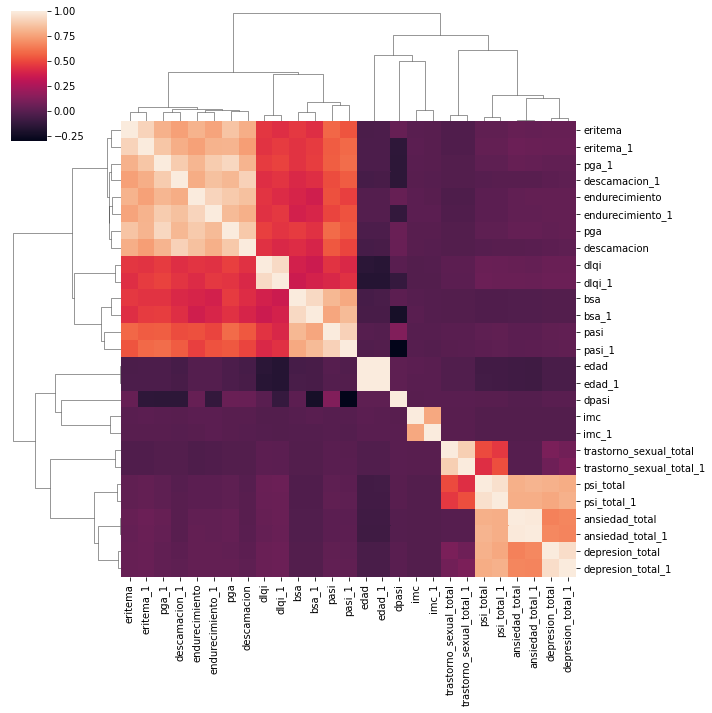

In [9]:
plt.figure(figsize=(20,20))
sns.clustermap(df4[["dpasi","pasi","dlqi","pga","imc","bsa","edad","eritema","endurecimiento","descamacion",
         "depresion_total","ansiedad_total","trastorno_sexual_total","psi_total",
                "pasi_1","dlqi_1","pga_1","imc_1","bsa_1","edad_1","eritema_1","endurecimiento_1","descamacion_1",
         "depresion_total_1","ansiedad_total_1","trastorno_sexual_total_1","psi_total_1"]].corr())

In [10]:
df4.dropna().shape

(3675, 189)

In [11]:
df4.shape

(18408, 189)

In [21]:
df4[df4["id"]==3499725][["id","ano","mes","dia","pasi_1","pasi","dpasi"]]

,id,ano,mes,dia,pasi_1,pasi,dpasi
1,3499725,2013,5,2,NaN,NaN,NaN
2,3499725,2013,7,29,NaN,NaN,NaN
3,3499725,2018,7,27,NaN,0.4,NaN
4,3499725,2018,10,24,0.4,0.4,0.0
5,3499725,2019,5,24,0.4,0.0,-0.4
6,3499725,2019,6,19,0.0,0.0,0.0
7,3499725,2019,7,9,0.0,0.0,0.0
8,3499725,2019,11,14,0.0,0.0,0.0
9,3499725,2019,12,9,0.0,0.2,0.2
10,3499725,2020,1,20,0.2,0.2,0.0


In [20]:
df2[df2["id"]==3499725][["id","ano","mes","dia","pasi"]]

,id,ano,mes,dia,pasi
14,3499725,2013,5,2,NaN
13,3499725,2013,7,29,NaN
12,3499725,2018,7,27,0.4
11,3499725,2018,10,24,NaN
10,3499725,2019,5,24,0.0
9,3499725,2019,6,19,NaN
8,3499725,2019,7,9,NaN
7,3499725,2019,11,14,NaN
6,3499725,2019,12,9,0.2
5,3499725,2020,1,20,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


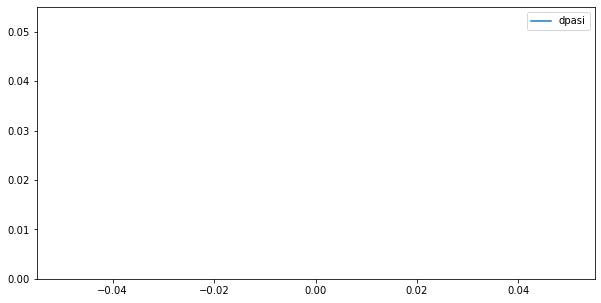

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
sns.kdeplot(df4.dropna()["dpasi"], shade=True,ax = ax);

In [14]:
df4["dpasi"].describe()

count    11919.000000
mean        -0.279092
std          2.646134
min        -50.700000
25%          0.000000
50%          0.000000
75%          0.000000
max         36.400000
Name: dpasi, dtype: float64

In [19]:
dpasi_f0 = ('pasi ~ pasi_1 + dlqi_1 + pga_1 + imc_1 + bsa_1 + edad_1 + '
            'eritema_1 + endurecimiento_1 + descamacion_1 + '
            'depresion_total_1 + ansiedad_total_1 + trastorno_sexual_total_1 + psi_total_1 + '
            'pasi_1*dlqi_1 + pasi_1*edad_1 + pasi_1*eritema_1 + pasi_1*endurecimiento_1 + pasi_1*descamacion_1 + '
            'C(medicamento_acido_folico) + C(medicamento_acido_retinoico) + '
            'C(medicamento_acitretin) + C(medicamento_adalimumab) + C(medicamento_alquitran_de_hulla) '
            )

model_f0 = smf.ols(formula = dpasi_f0, data = df4.dropna()).fit()
model_f0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pasi   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     999.4
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:04:44   Log-Likelihood:                -8140.1
No. Observations:                3675   AIC:                         1.632e+04
Df Residuals:                    3653   BIC:                         1.646e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.0588      0.194      0.303      0.762      -0.322       0.439
C(medicamento_acido_folico)[T.1.0]     0.2641      2.226      0.119      0.906      -4.100       4.628
C(medicamento_acitretin)[T.1.0]       -0.1580      0.186     -0.851      0.395      -0.522       0.206
C(medicamento_adalimumab)[T.1.0]      -0.0299      0.119     -0.252      0.801      -0.263       0.203
pasi_1                                 0.9107      0.041     22.334      0.000       0.831       0.991
dlqi_1                                 0.0253      0.007      3.546      0.000       0.011       0.039
pga_1                                 -0.0174      0.088     -0.199      0.843      -0.190       0.155
imc_1                                  0.0013      0.002      0.718      0.473      -0.002       0.005
bsa_1                                  0.0019      0.005      0.381      0.703      -0.008       0.012
edad_1                                -0.0017      0.003     -0.517      0.605      -0.008       0.005
eritema_1                              0.0039      0.076      0.051      0.959      -0.144       0.152
endurecimiento_1                       0.2560      0.088      2.893      0.004       0.083       0.429
descamacion_1                         -0.1866      0.092     -2.035      0.042      -0.366      -0.007
depresion_total_1                      0.3381      0.518      0.653      0.514      -0.678       1.354
ansiedad_total_1                       0.5472      0.530      1.032      0.302      -0.492       1.587
trastorno_sexual_total_1               0.6604      0.747      0.884      0.377      -0.804       2.125
psi_total_1                           -2.2050      2.454     -0.898      0.369      -7.017       2.607
pasi_1:dlqi_1                         -0.0067      0.001     -6.583      0.000      -0.009      -0.005
pasi_1:edad_1                          0.0020      0.000      4.183      0.000       0.001       0.003
pasi_1:eritema_1                       0.0026      0.008      0.324      0.746      -0.013       0.018
pasi_1:endurecimiento_1               -0.0499      0.010     -5.030      0.000      -0.069      -0.030
pasi_1:descamacion_1                   0.0275      0.011      2.545      0.011       0.006       0.049
==============================================================================
Omnibus:                     2576.692   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           983799.703
Skew:                          -2.154   Prob(JB):                         0.00
Kurtosis:                      83.039   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors ass

In [16]:
df["terapia biologica -> tratamiento activo"].describe()

count     3619
unique       2
top         no
freq      2266
Name: terapia biologica -> tratamiento activo, dtype: object